Processing Grayscale Image...


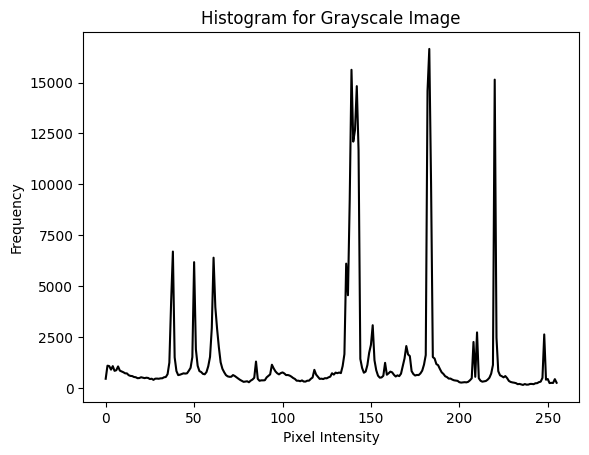

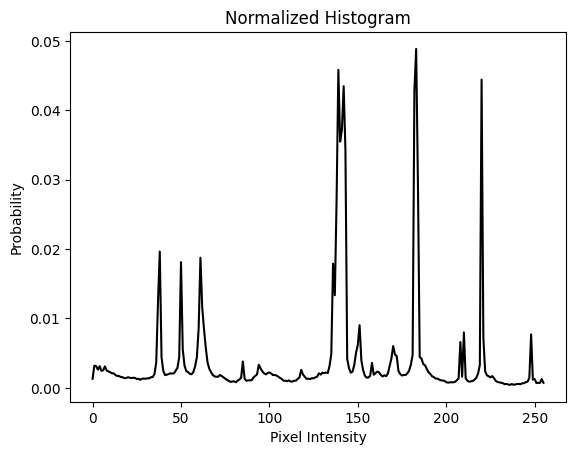

Processing Color Image...


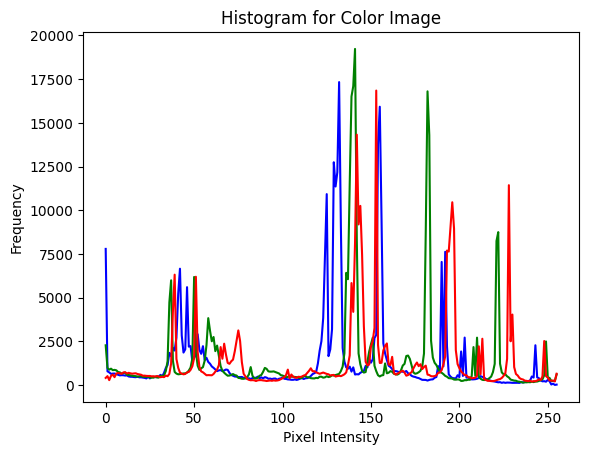

Performing Histogram Equalization...
Processing Bright Image...


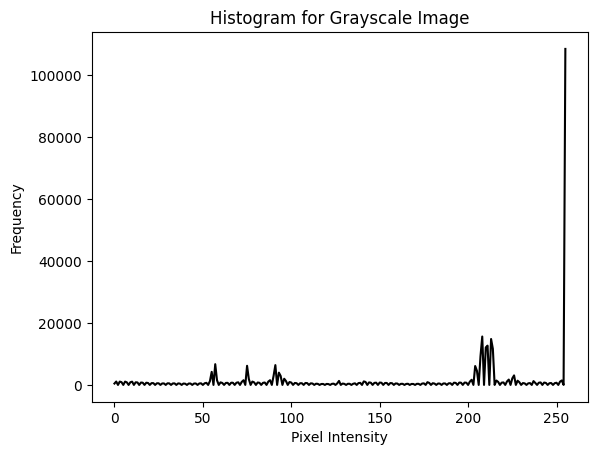

Processing Dark Image...


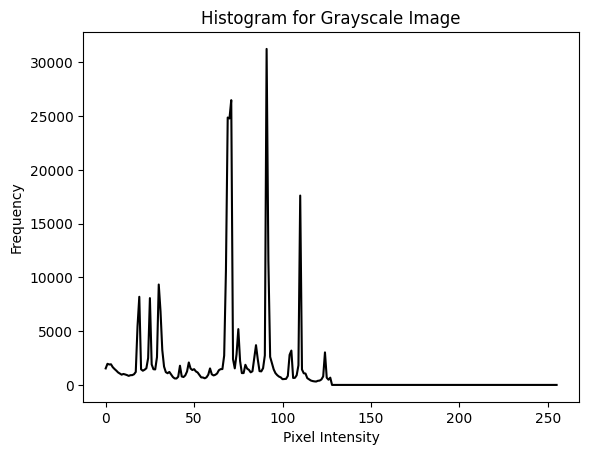

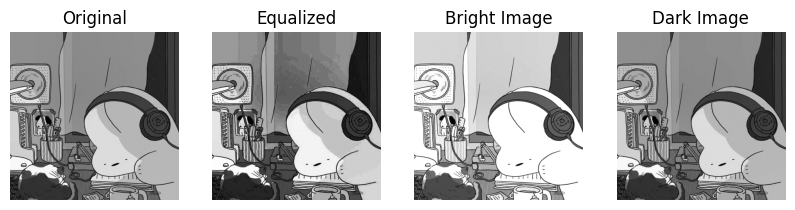

Processing Completed.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image, color=False):
    """Compute and display the histogram of a grayscale or color image."""
    if color:
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title('Histogram for Color Image')
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
        plt.title('Histogram for Grayscale Image')

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    return hist

def compute_normalized_histogram(hist):
    """Compute and display the normalized histogram (probability)."""
    hist_norm = hist / hist.sum()
    plt.plot(hist_norm, color='black')
    plt.title('Normalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability')
    plt.show()

def histogram_equalization(image):
    equalized = cv2.equalizeHist(image)
    return equalized

def adjust_brightness(image, factor):
    bright_image = np.clip(image * factor, 0, 255).astype(np.uint8)
    return bright_image

def process_image(image_path):
    color_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    print("Processing Grayscale Image...")
    hist_gray = compute_histogram(gray_image)
    compute_normalized_histogram(hist_gray)

    print("Processing Color Image...")
    compute_histogram(color_image, color=True)

    print("Performing Histogram Equalization...")
    enhanced_image = histogram_equalization(gray_image)

    # Generate bright and dark versions
    bright_image = adjust_brightness(gray_image, 1.5)
    dark_image = adjust_brightness(gray_image, 0.5)

    # Compute histograms for bright and dark images
    print("Processing Bright Image...")
    compute_histogram(bright_image)
    print("Processing Dark Image...")
    compute_histogram(dark_image)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Equalized')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(bright_image, cmap='gray')
    plt.title('Bright Image')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(dark_image, cmap='gray')
    plt.title('Dark Image')
    plt.axis('off')
    plt.show()

    print("Processing Completed.")

image_path = 'image.jpeg'
process_image(image_path)


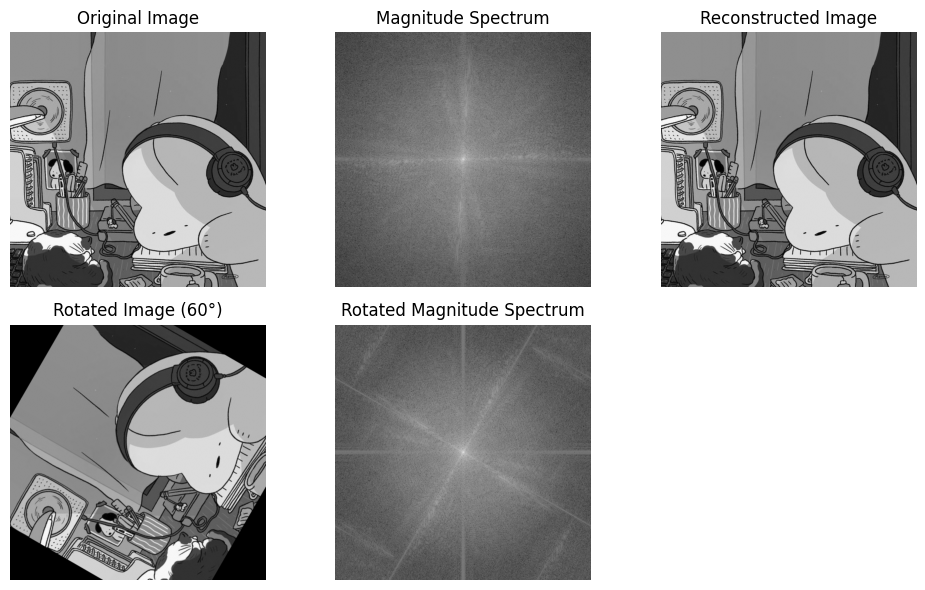

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft_shift, magnitude_spectrum

def compute_ifft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    reconstructed_image = np.fft.ifft2(dft_ishift)
    reconstructed_image = np.abs(reconstructed_image)
    return reconstructed_image

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

def display_results(original, spectrum, reconstructed, rotated, rotated_spectrum):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 3, 1), plt.imshow(original, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(2, 3, 2), plt.imshow(spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')

    plt.subplot(2, 3, 3), plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed Image'), plt.axis('off')

    plt.subplot(2, 3, 4), plt.imshow(rotated, cmap='gray')
    plt.title('Rotated Image (60°)'), plt.axis('off')

    plt.subplot(2, 3, 5), plt.imshow(rotated_spectrum, cmap='gray')
    plt.title('Rotated Magnitude Spectrum'), plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load grayscale image
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Compute FFT and magnitude spectrum
dft_shift, magnitude_spectrum = compute_fft(image)

# Compute IFFT to reconstruct the image
reconstructed_image = compute_ifft(dft_shift)

# Rotate image and compute FFT
rotated_image = rotate_image(image, 60)
rotated_dft_shift, rotated_magnitude_spectrum = compute_fft(rotated_image)

display_results(image, magnitude_spectrum, reconstructed_image, rotated_image, rotated_magnitude_spectrum)
